In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('fivethirtyeight')

# SMA for IBM stock 

In [ ]:
# load data
df = pd.read_csv("IBM_stock.csv")
# set index to date 
df = df.set_index(pd.DatetimeIndex(df['time'].values))

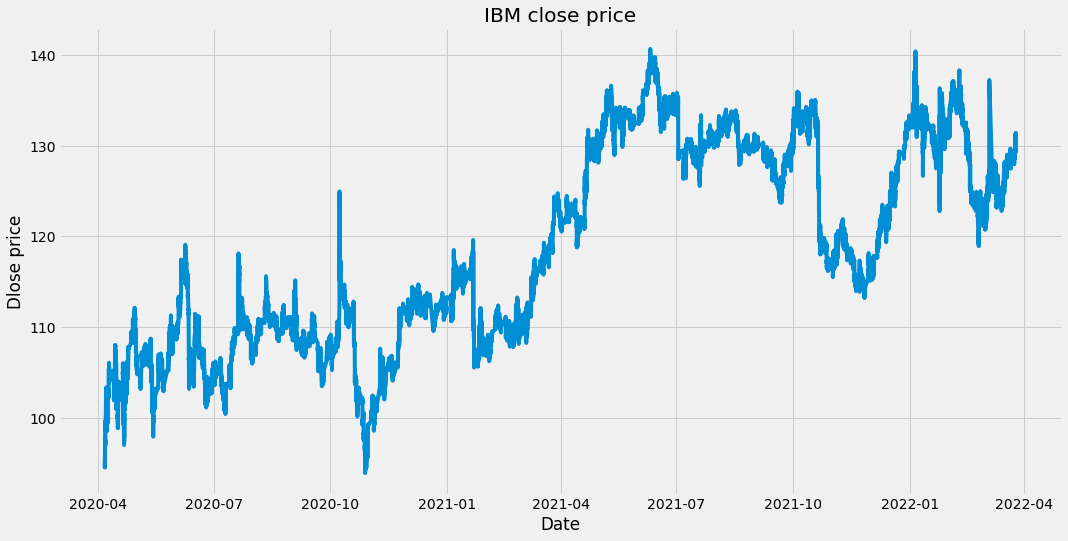

In [21]:
#visulaize close price
plt.figure(figsize=(16, 8))
plt.title('IBM close price')
plt.plot(df['close'])
plt.xlabel('Date')
plt.ylabel('Dlose price')
plt.show()

# Calculate SMA

In [22]:
def SMA(df, period=30, column='close'):
    return df[column].rolling(window=period).mean()
    

In [31]:
# add new column to store SMA
df['SMA30'] = SMA(df)
#fill nan values with 0
df['SMA30'] = df['SMA30'].fillna(0)
df

,time,open,high,low,close,volume,SMA30
2022-03-25 19:19:00,3/25/2022 19:19,131.300000,131.300000,131.300000,131.300000,718,0.000000
2022-03-25 19:18:00,3/25/2022 19:18,131.300000,131.300000,131.300000,131.300000,282,0.000000
2022-03-25 17:50:00,3/25/2022 17:50,131.300000,131.300000,131.300000,131.300000,100,0.000000
2022-03-25 16:59:00,3/25/2022 16:59,131.340000,131.350000,131.340000,131.350000,1427,0.000000
2022-03-25 16:42:00,3/25/2022 16:42,131.326000,131.350000,131.326000,131.350000,1326,0.000000
...,...,...,...,...,...,...,...
2020-04-06 07:27:00,4/6/2020 7:27,95.385037,95.385037,95.385037,95.385037,854,94.938431
2020-04-06 07:25:00,4/6/2020 7:25,94.530379,94.530379,94.530379,94.530379,450,94.925769
2020-04-06 07:08:00,4/6/2020 7:08,94.703037,94.703037,94.703037,94.703037,436,94.924330
2020-04-06 07:02:00,4/6/2020 7:02,95.479999,95.479999,95.479999,95.479999,575,94.941596


# Strategy is to buy asset when SMA30 is below closing price and sell when it is above closing price but dont sell at bought price

In [32]:
def strategy(df):
    buy = []
    sell = []
    #flag indicates whether we last bought or sold assete
    flag = 0
    buy_price = 0
    
    for i in range(0, len(df)):
        if  df['SMA30'][i] > df['close'][i] and flag == 0:
            buy.append(df['close'][i])
            sell.append(np.nan)
            buy_price = df['close'][i]
            flag = 1
        elif df['SMA30'][i] < df['close'][i] and flag == 1 and buy_price < df['close'][i]:
            sell.append(df['close'][i])
            buy.append(np.nan)
            buy_price = 0
            flag = 0
        else:
            sell.append(np.nan)
            buy.append(np.nan)
        
    return (buy, sell)
            

# Grab the buy and sell list

In [58]:
strat = strategy(df)
df['buy'] = strat[0]
df['sell'] = strat[1]
dfx = df['2022-02-01':'2022-02-26']
dfx.describe()

/var/folders/b4/xh5zfpts0119mcj38jk1rt500000gn/T/ipykernel_1701/837344540.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  dfx = df['2022-02-01':'2022-02-26']


,open,high,low,close,volume,SMA30,buy,sell
count,7341.000000,7341.000000,7341.000000,7341.000000,7.341000e+03,7341.000000,147.000000,147.000000
mean,130.066774,130.112865,130.017223,130.064306,1.017271e+04,130.043313,132.386465,132.459141
std,5.447932,5.444276,5.452429,5.447821,2.099898e+04,5.448681,3.277303,3.281040
min,118.910000,119.100000,118.810000,118.913400,1.000000e+02,119.312460,124.970000,125.190000
25%,124.340000,124.370000,124.290000,124.330000,4.313000e+03,124.275500,129.960000,130.025000
50%,130.545000,130.600000,130.495000,130.541600,6.924000e+03,130.514330,132.780000,132.920000
75%,135.290000,135.337575,135.242839,135.293220,1.120300e+04,135.289278,135.726471,135.751228
max,138.301273,138.301273,138.301273,138.301273,1.084638e+06,136.903768,136.878745,136.957774


# visualize close price and buy/sell signals

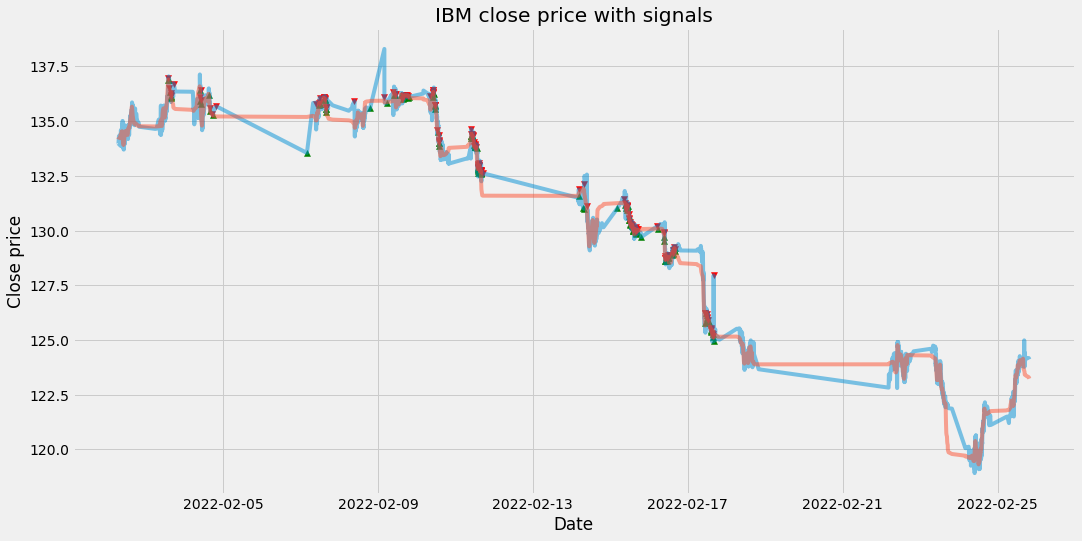

In [59]:
plt.figure(figsize=(16, 8))
plt.title('IBM close price with signals')
plt.plot(dfx['close'], alpha = 0.5, label = 'close')
plt.plot(dfx['SMA30'], alpha=0.5, label = 'SMA30')
plt.scatter(dfx.index, dfx['buy'], color='green', label='Buy signal', marker='^', alpha=1)
plt.scatter(dfx.index, dfx['sell'], color='red', label='Sell signal', marker='v', alpha=1)
plt.xlabel('Date')
plt.ylabel('Close price')
plt.show()